In [1]:
import requests
import pandas as pd
import json

def get_data(**params):
    url = "https://www.nationsreportcard.gov/Dataservice/GetAdhocData.aspx"
    response = requests.get(url, params=params)
    if response.status_code == 200:
        try:
            response
            data = json.loads(response.content.replace(b"\\", b"\\\\").decode('utf-8'))
            if data['status'] == 400:
                raise Exception(data['result'])
            elif data['status'] == 200:
                # process successful response
                return pd.DataFrame(data['result'])
            else:
                print("Error:", data['result'])
        except json.JSONDecodeError as e:
            print("JSON Decode Error:", e)
            print("Response Content:", response.content.decode('utf-8'))
        except Exception as e:
            print("Error:", e)
    else:
        print("Error:", response.status_code)
        return None



`civics`: 1998, 2006, 2010

`economics`: 2006, 2012 (cohort 3 only)

`geography`: 1994, 2001, 2010

`mathematics`: 1990, 1992, 1996, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2022

`music`: 2008, 2016 (cohort 2 only)

`reading`: 1992, 1994, 1998, 2002, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2022

`science`: 2009, 2015, 2019

A value of 999 for a statistics typically indicates that the reporting standard was not met.

In [2]:
params = {
    "type": "independentvariables",
    "subject": "mathematics",
    "cohort": "1",
    "year": "1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023"
}

df = get_data(**params)
print("years available:")
print(df['year'])
print()
year_index = 14
print("variables available for year:", df['year'][year_index])
print()
for variable in df['variables'][year_index]:
    print(f"Variable Name: {variable['varName']}")
    print(f"Short Label: {variable['shortLabel']}")
    print(f"Long Label: {variable['longLabel']}")
    print()


years available:
0     1990
1     1992
2     1996
3     1996
4     2000
5     2000
6     2003
7     2005
8     2007
9     2009
10    2011
11    2013
12    2015
13    2017
14    2019
15    2022
Name: year, dtype: int64

variables available for year: 2019

Variable Name: B013801
Short Label: Books in home
Long Label: About how many books are there in your home? (student-reported)

Variable Name: B017451
Short Label: Talk about studies at home
Long Label: How often do you talk about things you have studied in school with someone in your family? (student-reported)

Variable Name: B018101
Short Label: Days absent from school in the last month
Long Label: How many days were you absent from school in the last month? (student-reported)

Variable Name: B034001
Short Label: Test's difficulty level
Long Label: How easy or difficult was this test? (student-reported)

Variable Name: B034101
Short Label: Effort applied to succeed on test
Long Label: How much effort did you apply to succeed on this t

Juristiction:

- NT - National
- NP - National public
- NR - National private
- NL - Large city

Use state abbreviations for the rest of the juristictions.

`stattype`

MN:MN – Mean

RP:RP – row percent

ALD:BA – Discrete achievement level – At Basic

ALD:PR – Discrete achievement level – At Proficient

ALD:AD – Discrete achievement level – At Advanced

ALC:BB – Cumulative achievement level  - Below Basic

ALC:AB – Cumulative achievement level – At or above Basic

ALC:AP – Cumulative achievement level – At or above Proficient

ALC:AD – Cumulative achievement level – At Advanced

SD:SD – Standard deviations

PC:P1 – 10th percentile

PC:P2 – 25th percentile

PC:P5 – 50th percentile

PC:P7 – 75th percentile

PC:P9 – 90th percentile

In [3]:
# all states variable
all_states = "AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,GA,HI,ID,IL,IN,IA,KS,KY,LA,ME,MD,MA,MI,MN,MS,MO,MT,NE,NV,NH,NJ,NM,NY,NC,ND,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY"

*Student Reported*

B013801: Books in home

B034501: Use Internet for homework at home

B034601: Lives in home with mother

B034903: Keep working hard even when I feel like quitting

B035002: Paid attention and resisted distractions

B035101: Like complex problems more than easy ones

B035201: Felt awkward and out of place at school

*School Reported*

C036501: Percent of teachers absent on average day

C038301: School participates in National School Lunch Program

C044006: Percent recieving ESL instruction

C051801: Percent recieving targeted Title I services

C060802: Prepare for state assessments in math

C0863I1: School type is private religiously affiliated

C087201: Number of volunteers

*Other*

CENSDIV: Census division

CENSREG: Region of the country

CHRTRPT: School identified as charter

DRACEM: Race/ethnicity allowing multiple responses, student-reported

GENDER: Gender

M831503: Want to look smart in comparison to others in math

MODAGE: Below, at, or above age of most students in grade

PCTWHTC: Percent of White students

UTOL4: School location

*Teacher Reported*

T122201: Years taught elementary or secondary

T126008:  Graduate major or minor in education with elementary

T132801: Possibility of student change in intelligence

T132802: Possibility of student change in intelligence

T132803: Possibility of student change in classroom behavior

T139901: Tenured in current school/district/diocese

TNSTUDM: Number of students in math class





In [44]:
params = {
    "type": "data",
    "subject": "mathematics",
    "cohort": "1",
    # "subscale": "MRPCM",
    # "variable": "B013801+B034501+B034601+B034903+B035002+B035101+B035201+C036501+C038301+C044006+C044007+C051801+C060802+C0863I1+C087201+C102804+CENSDIV+CENSREG+CHRTRPT+DRACEM+GENDER+M831503+MODAGE+PCTWHTC+UTOL4+T122201+T126008+T132801+T132802+T132803+T139901+TNSTUDM",
    "variable": "C036501+C038301+C044006+C051801+C060802+C0863I1+C087201",
    "jurisdiction": "NT",
    "stattype": "MN:MN",
    "Year": "2019",
}

raw = get_data(**params)
raw

In [35]:
student = raw

student = student[student['value'] != 999]

variables = student['variable'].str.split('+', expand=True).iloc[0].tolist()
varValues = student['varValueLabel'].str.split('+', expand=True)
varValues.columns = variables
student = pd.concat([df, varValues], axis=1)
student = student[['B013801','B034501','B034601','B034903','B035002','B035101','B035201', 'value']]
student

,B013801,B013801,B034501,B034501,B034601,B034601,B034903,B034903,B035002,B035002,B035101,B035101,B035201,B035201,value
0,0-10 books,0-10 books,Never,Never,Yes,Yes,Not at all like me,Not at all like me,Never or hardly ever,Never or hardly ever,Not at all like me,Not at all like me,Never or hardly ever,Never or hardly ever,201.360839
1,11-25 books,11-25 books,Never,Never,Yes,Yes,Not at all like me,Not at all like me,Never or hardly ever,Never or hardly ever,Not at all like me,Not at all like me,Never or hardly ever,Never or hardly ever,211.640323
601,11-25 books,11-25 books,Never,Never,Yes,Yes,A little bit like me,A little bit like me,Less than half of the time,Less than half of the time,Not at all like me,Not at all like me,Never or hardly ever,Never or hardly ever,216.976514
1102,26-100 books,26-100 books,Never,Never,Yes,Yes,Somewhat like me,Somewhat like me,Less than half of the time,Less than half of the time,Not at all like me,Not at all like me,Never or hardly ever,Never or hardly ever,233.351912
1222,26-100 books,26-100 books,Never,Never,Yes,Yes,Somewhat like me,Somewhat like me,About half of the time,About half of the time,A little bit like me,A little bit like me,Never or hardly ever,Never or hardly ever,259.182279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22483,More than 100 books,More than 100 books,Every day,Every day,Yes,Yes,Very much like me,Very much like me,All or almost all of the time,All or almost all of the time,Very much like me,Very much like me,Never or hardly ever,Never or hardly ever,247.426428
22496,0-10 books,0-10 books,Every day,Every day,Yes,Yes,Very much like me,Very much like me,All or almost all of the time,All or almost all of the time,Very much like me,Very much like me,All or most of time,All or most of time,215.015875
22497,11-25 books,11-25 books,Every day,Every day,Yes,Yes,Very much like me,Very much like me,All or almost all of the time,All or almost all of the time,Very much like me,Very much like me,All or most of time,All or most of time,205.309523
22498,26-100 books,26-100 books,Every day,Every day,Yes,Yes,Very much like me,Very much like me,All or almost all of the time,All or almost all of the time,Very much like me,Very much like me,All or most of time,All or most of time,224.088235


In [ ]:
school = raw

school = school[school['value'] != 999]

variables = school['variable'].str.split('+', expand=True).iloc[0].tolist()
varValues = school['varValueLabel'].str.split('+', expand=True)
varValues.columns = variables
school = pd.concat([df, varValues], axis=1)
school = school[['C036501','C038301','C044006','C044007','C051801','C060802','C0863I1','C087201','C102804', 'value']]
school

/Users/tsigall/miniforge3/envs/dsan5300/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tsigall/miniforge3/envs/dsan5300/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


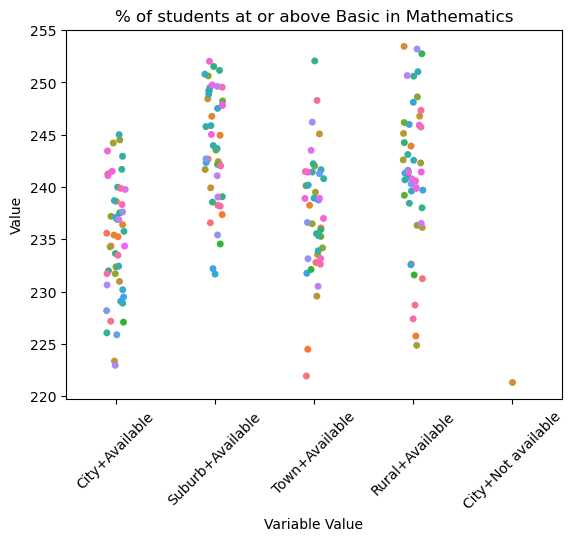

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.stripplot(data=df, x='varValueLabel', y='value', hue='jurisdiction', jitter=True)
plt.xlabel('Variable Value')
plt.ylabel('Value')
plt.title('% of students at or above Basic in Mathematics')
plt.legend().remove()  # Remove the legend
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()



